In [1]:
import galah
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely
from shapely.ops import unary_union, linemerge, split
from shapely.geometry import Point
import numpy as np
import alphashape

In [2]:
galah.galah_config(atlas="Australia", email="callumwaite2000@gmail.com", data_profile="ALA") 

In [3]:
galah.search_taxa(taxa="Varanus gouldii")

,scientificName,scientificNameAuthorship,taxonConceptID,rank,kingdom,phylum,order,family,genus,species,vernacularName,issues
0,Varanus gouldii,"(Gray, 1838)",https://biodiversity.org.au/afd/taxa/e0a1cf2b-...,species,Animalia,Chordata,Squamata,Varanidae,Varanus,Varanus gouldii,Gould's Goanna,noIssue


In [4]:
galah.atlas_counts(taxa="Varanus gouldii",use_data_profile=True)

,totalRecords
0,11267


In [5]:
galah.atlas_counts(taxa="Varanus gouldii",use_data_profile=True,group_by="basisOfRecord",expand=False)

,basisOfRecord,count
0,HUMAN_OBSERVATION,8371
1,MACHINE_OBSERVATION,27
2,MATERIAL_CITATION,1
3,MATERIAL_SAMPLE,447
4,OBSERVATION,113
5,OCCURRENCE,978
6,PRESERVED_SPECIMEN,1330


In [6]:
galah.atlas_counts(taxa="Varanus gouldii",use_data_profile=True,filters="basisOfRecord=HUMAN_OBSERVATION",group_by="dataResourceName",expand=False)

,dataResourceName,count
0,NSW BioNet Atlas,3120
1,Fauna Atlas N.T.,2146
2,SA Fauna,1627
3,iNaturalist Australia,935
4,WildNet - Queensland Wildlife Data,378
5,Earth Guardians Weekly Feed,76
6,ALA species sightings and OzAtlas,62
7,Northern Territory WildWatch,10
8,NatureShare,9
9,NatureMapr,7


In [7]:
galah.atlas_counts(taxa="Varanus gouldii",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],group_by="dataResourceName",expand=False)

,dataResourceName,count
0,NSW BioNet Atlas,3114
1,Fauna Atlas N.T.,2116
2,SA Fauna,1627
3,iNaturalist Australia,935
4,WildNet - Queensland Wildlife Data,357
5,Earth Guardians Weekly Feed,76
6,ALA species sightings and OzAtlas,62
7,Northern Territory WildWatch,10
8,NatureShare,9
9,NatureMapr,7


In [8]:
galah.atlas_counts(taxa="Varanus gouldii",use_data_profile=True,filters=["basisOfRecord=HUMAN_OBSERVATION","year>=1970"],group_by="year",expand=False)

,year,count
0,1970,2
1,1971,1
2,1972,2
3,1973,1
4,1974,5
5,1975,12
6,1976,18
7,1977,4
8,1978,6
9,1979,17


In [9]:
sand_goanna_occ = galah.atlas_occurrences(
    taxa="Varanus gouldii",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"]
)

In [10]:
states_territories = gpd.read_file("Shapefiles/STE_2021_AUST_GDA2020/STE_2021_AUST_GDA2020.shp")
states_territories_main = states_territories[states_territories["STE_NAME21"] != "Other Territories"]
states_territories_main = states_territories_main.to_crs(4326)

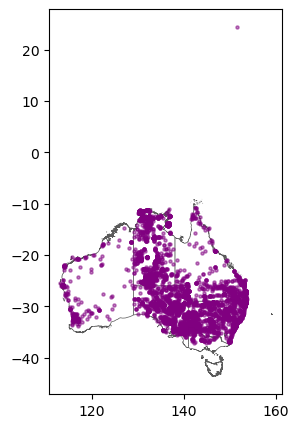

In [11]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(
    sand_goanna_occ["decimalLongitude"],
    sand_goanna_occ["decimalLatitude"],
    c = "purple", 
    s = 5,
    alpha = 0.5
)   

In [12]:
data_provider_counts = galah.atlas_counts(
    taxa="Varanus gouldii",
    use_data_profile=True,
    filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "decimalLatitude<0"],
    group_by="dataResourceName",
    expand=False)

In [13]:
occurrences = {data_provider_counts["dataResourceName"][i]: None for i in range(10)}
for i in range(10):
    occurrences[data_provider_counts["dataResourceName"][i]] = galah.atlas_occurrences(
            taxa="Varanus gouldii",
            use_data_profile=True,
            filters=["basisOfRecord=HUMAN_OBSERVATION", 
                     "year>=1970",
                     "decimalLatitude<0",
                     "dataResourceName={}".format(data_provider_counts["dataResourceName"][i])]
        )

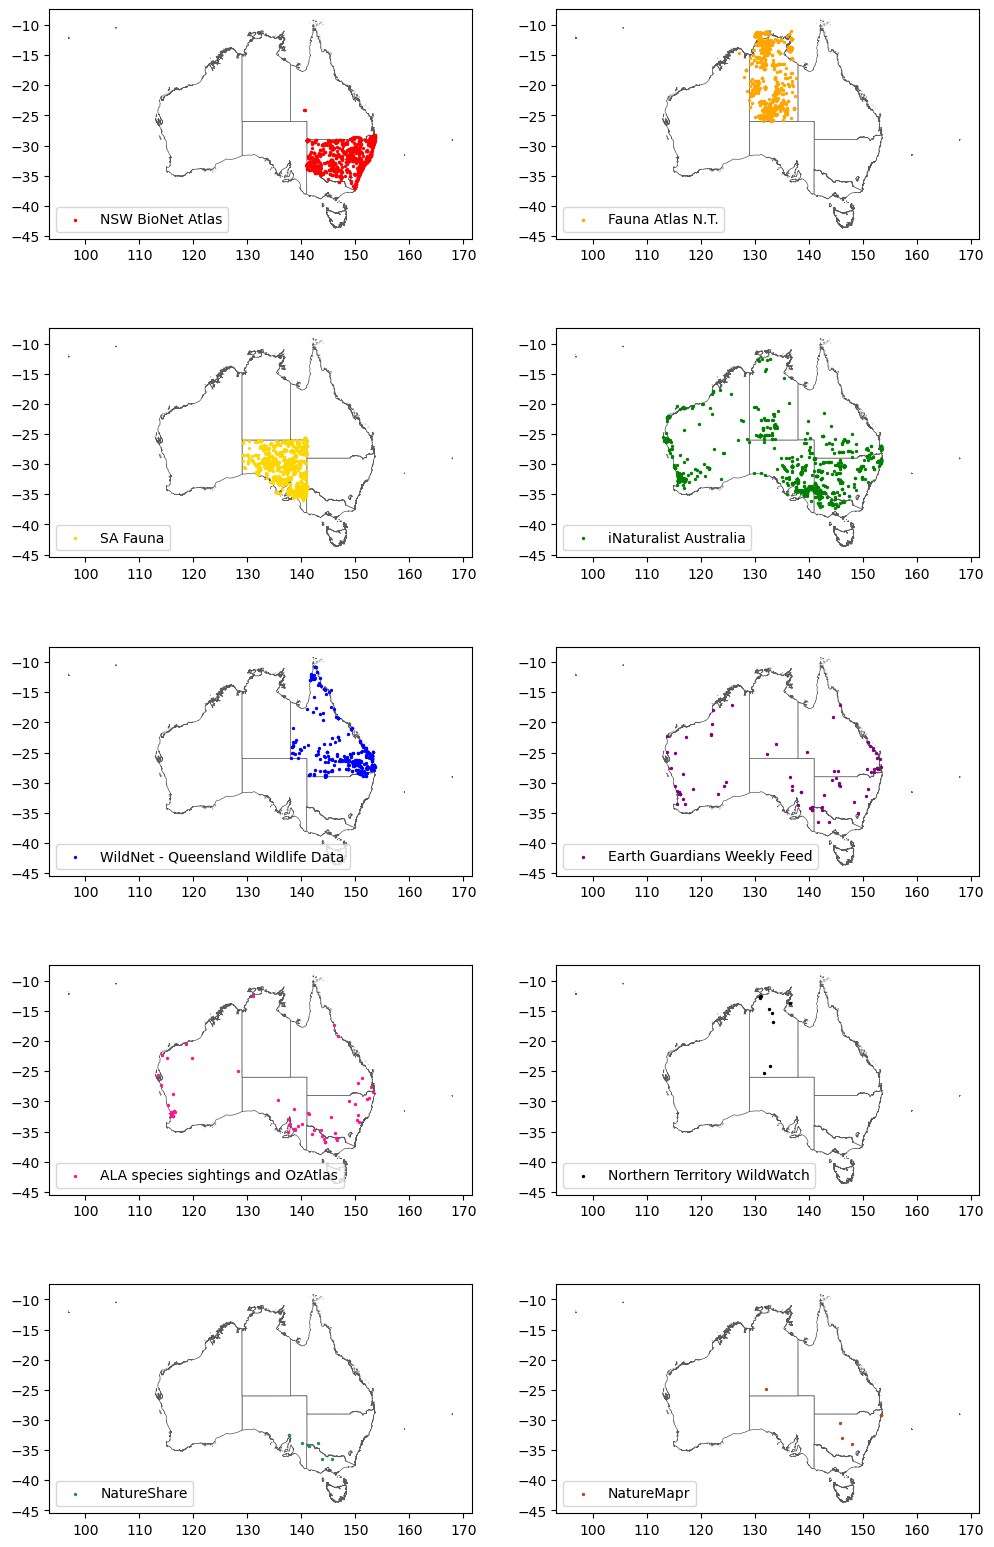

In [23]:
fig, axs = plt.subplots(5,2,figsize=(12,20))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(5):
    for j in range(2):
        index_for_occurrences+=j
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
    index_for_occurrences+=1

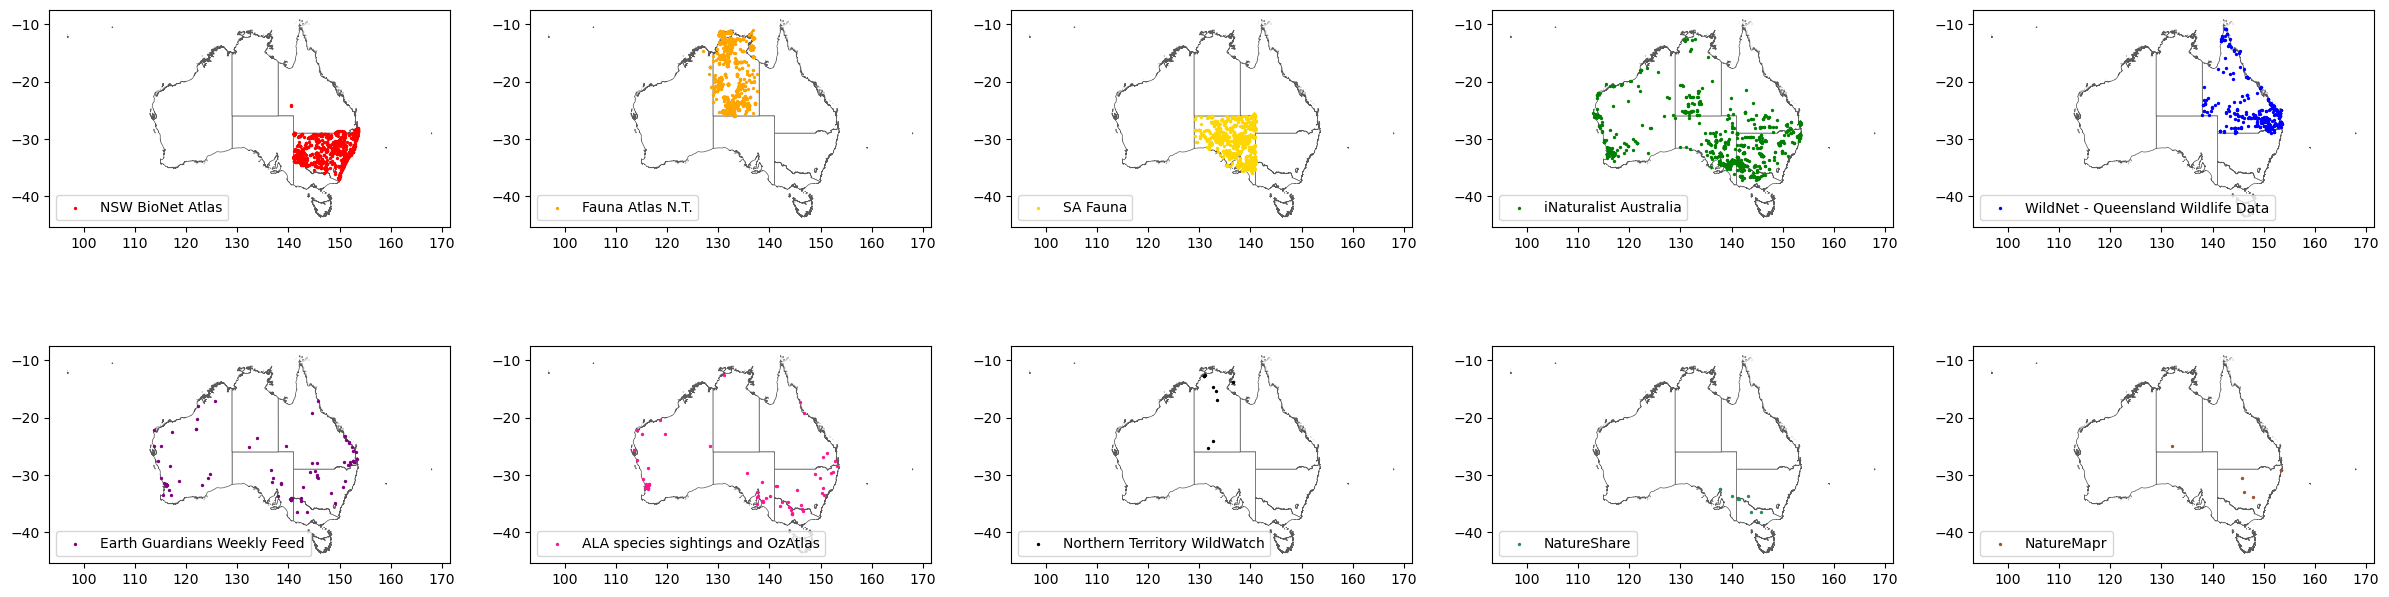

In [24]:
fig, axs = plt.subplots(2,5,figsize=(30,8))
index_for_occurrences = 0
colors = ["red","orange","gold","green","blue","purple","deeppink","black","seagreen","sienna"]
for i in range(2):
    for j in range(5):
        states_territories.plot(ax = axs[i][j], edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
        axs[i][j].scatter(
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLongitude"],
            occurrences[data_provider_counts["dataResourceName"][index_for_occurrences]]["decimalLatitude"],
            c = colors[index_for_occurrences], 
            s=2,
            label=data_provider_counts["dataResourceName"][index_for_occurrences]
        )
        axs[i][j].legend(loc="lower left")
        index_for_occurrences+=1
plt.savefig("SG_dataresourcename_map.png",dpi=600)

In [25]:
## Occurrences Australia wide vs all species vs reptiles

In [14]:
SG_AUS = galah.atlas_counts(
    taxa="Varanus gouldii",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970",
        "decimalLatitude<0"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "Sand Goanna"})

In [15]:
all_species_AUS = galah.atlas_counts(
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "All Species"})

In [16]:
reptiles_AUS = galah.atlas_counts(
    taxa = "Reptilia",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION",
        "year>=1970"
    ],
    group_by=["year"],
    expand=False).rename(columns={"count": "Reptiles"})

In [17]:
counts_year = all_species_AUS.merge(reptiles_AUS, on="year", how="left").merge(SG_AUS, on="year", how="left").fillna(0)
counts_year.head()

,year,All Species,Reptiles,Sand Goanna
0,1970,172817,285,2
1,1971,77237,236,1
2,1972,67950,448,2
3,1973,74749,357,1
4,1974,69969,419,5


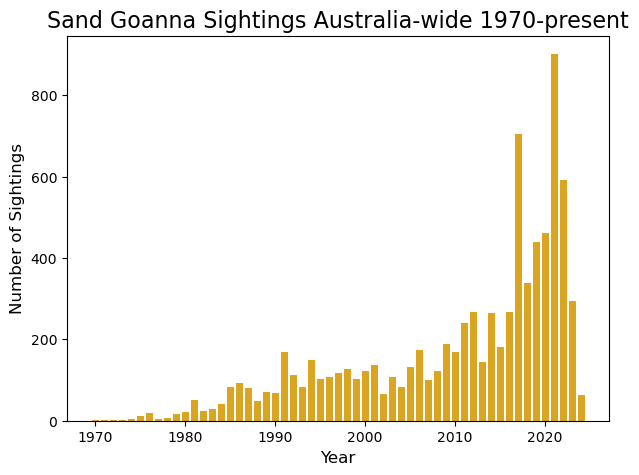

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.bar(counts_year["year"], counts_year["Sand Goanna"],color = "goldenrod") # alpha = 0.5
plt.title("Sand Goanna Sightings Australia-wide 1970-present",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Number of Sightings",fontsize=12)
plt.savefig("SG_by_year_Aus.png",dpi=600)

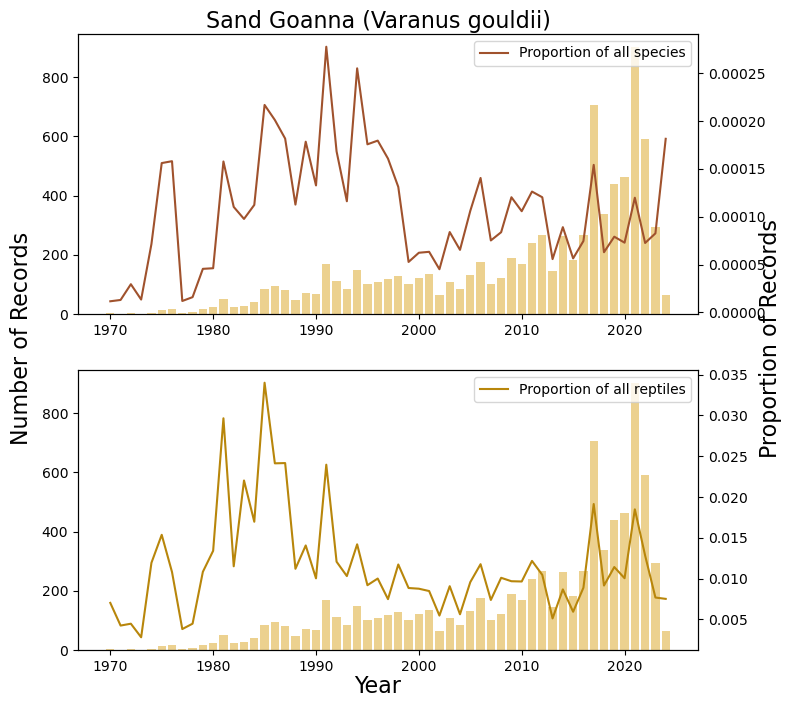

In [19]:
counts_year["Proportion of total counts all"] = counts_year["Sand Goanna"] / counts_year["All Species"]
counts_year["Proportion of total counts reptiles"] = counts_year["Sand Goanna"] / counts_year["Reptiles"]
counts_year.head()

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_year["year"], counts_year["Sand Goanna"], color = "goldenrod", alpha=0.5)
ax2.plot(counts_year["year"], counts_year["Proportion of total counts all"], color="sienna", label="Proportion of all species")
ax2.legend()

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_year["year"], counts_year["Sand Goanna"], color = "goldenrod", alpha=0.5)
ax3.plot(counts_year["year"], counts_year["Proportion of total counts reptiles"], color="darkgoldenrod", label="Proportion of all reptiles")
ax3.legend()

# add title
fig.suptitle("Sand Goanna (Varanus gouldii)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("SG_Proportions_AUS_vertical.png",dpi=300)

In [20]:
##### Dingo Fence

In [21]:
SA = states_territories[states_territories["STE_NAME21"] == "South Australia"]
dog_fence = gpd.read_file("Shapefiles/SA Dingo Fence/Dog_Fence.shp").to_crs(4326)

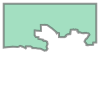

In [22]:
SA_shapely = shapely.ops.unary_union(SA.geometry)
dog_fence_shapely = shapely.ops.unary_union(dog_fence.geometry)
SA_split_shapely = split(SA_shapely, dog_fence_shapely)
# Note that [90] is the part of SA north of the dog fence
SA_split_shapely.geoms[90]

In [23]:
SG_SA_N = galah.atlas_counts(taxa="Varanus gouldii", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Sand Goanna N"})
SG_SA_all = galah.atlas_counts(taxa="Varanus gouldii", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Sand Goanna"})
all_species_SA_N = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "All Species N"})
all_species_SA_all = galah.atlas_counts(use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "All Species"})
reptiles_SA_N = galah.atlas_counts(taxa="Reptilia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], polygon = SA_split_shapely.geoms[90], expand=False).rename(columns={"count": "Reptiles N"})
reptiles_SA_all = galah.atlas_counts(taxa="Reptilia", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"], group_by = ["year"], expand=False).rename(columns={"count": "Reptiles"}) 

In [24]:
counts_SA_year_all = all_species_SA_all.merge(reptiles_SA_all, on="year", how="left").merge(SG_SA_all, on="year", how="left").fillna(0)
counts_SA_year_N = all_species_SA_N.merge(reptiles_SA_N, on="year", how="left").merge(SG_SA_N, on="year", how="left").fillna(0)
counts_SA_year_NS = counts_SA_year_all.merge(counts_SA_year_N, on="year", how="left").fillna(0)
counts_SA_year_NS["All Species S"] = counts_SA_year_NS["All Species"] - counts_SA_year_NS["All Species N"]
counts_SA_year_NS["Reptiles S"] = counts_SA_year_NS["Reptiles"] - counts_SA_year_NS["Reptiles N"]
counts_SA_year_NS["Sand Goanna S"] = counts_SA_year_NS["Sand Goanna"] - counts_SA_year_NS["Sand Goanna N"]

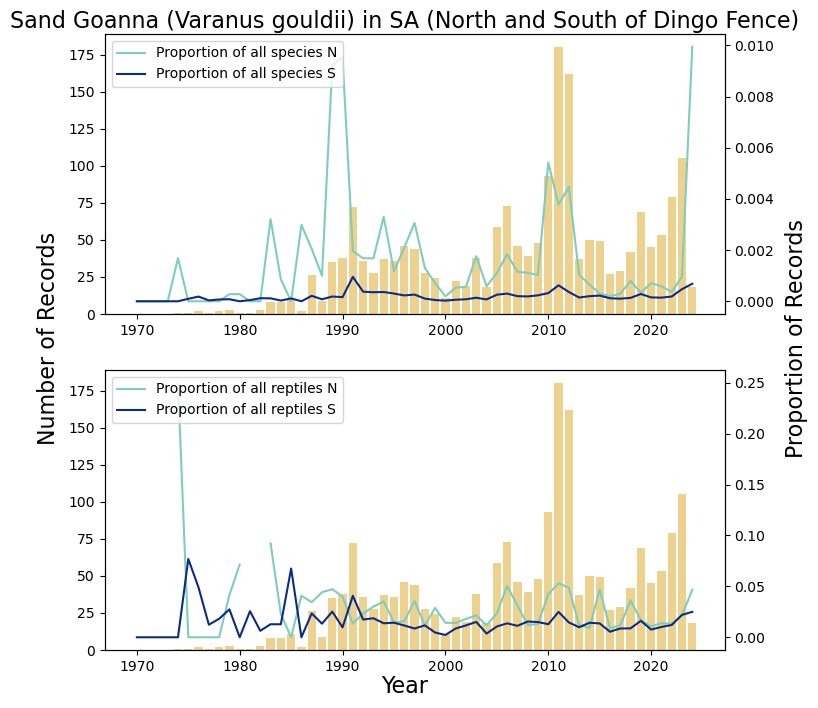

In [25]:
counts_SA_year_NS["SA proportion of total counts all N"] = counts_SA_year_NS["Sand Goanna N"] / counts_SA_year_NS["All Species N"]
counts_SA_year_NS["SA proportion of total counts all S"] = counts_SA_year_NS["Sand Goanna S"] / counts_SA_year_NS["All Species S"]
counts_SA_year_NS["SA proportion of total counts reptiles N"] = counts_SA_year_NS["Sand Goanna N"] / counts_SA_year_NS["Reptiles N"]
counts_SA_year_NS["SA proportion of total counts reptiles S"] = counts_SA_year_NS["Sand Goanna S"] / counts_SA_year_NS["Reptiles S"]

fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax2 = ax[0].twinx()
ax[0].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Sand Goanna"], color = "goldenrod", alpha=0.5)
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all N"], color="#7fcdbb", label="Proportion of all species N")
ax2.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts all S"], color="#0c2c84", label="Proportion of all species S")
ax2.legend(loc = "upper left")

# second graph
ax3 = ax[1].twinx()
ax[1].bar(counts_SA_year_NS["year"], counts_SA_year_NS["Sand Goanna"], color = "goldenrod", alpha=0.5)
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts reptiles N"], color="#7fcdbb", label="Proportion of all reptiles N")
ax3.plot(counts_SA_year_NS["year"], counts_SA_year_NS["SA proportion of total counts reptiles S"], color="#0c2c84", label="Proportion of all reptiles S")
ax3.legend(loc = "upper left")

# add title
fig.suptitle("Sand Goanna (Varanus gouldii) in SA (North and South of Dingo Fence)",size=16,y=0.91)
fig.supxlabel("Year",size=16,y=0.05)
fig.supylabel("Number of Records",size=16,x=0.04)
fig.text(x=0.99, y=0.5, s="Proportion of Records", size=16, rotation=90, ha='center', va='center')
plt.savefig("SG_dingo_fence_proportions_SA_vertical.png",dpi=300)

In [26]:
SG_SA_occs = galah.atlas_occurrences(taxa="Varanus gouldii", use_data_profile=True, filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970", "cl22=South Australia"])

In [27]:
geometry = [Point(xy) for xy in zip(SG_SA_occs.decimalLongitude, SG_SA_occs.decimalLatitude)]

In [28]:
SG_SA_occs = gpd.GeoDataFrame(SG_SA_occs, crs="EPSG:4326", geometry=geometry)
dingo_fence_N_gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:4326', geometry=[SA_split_shapely.geoms[90]])

In [29]:
SG_SA_occs_NS = gpd.sjoin(dingo_fence_N_gdf, SG_SA_occs, how = "right")
SG_SA_occs_NS["Side of Dingo Fence"] = ['S' if pd.isnull(a) else 'N' for a in SG_SA_occs_NS['index_left']]
SG_SA_occs_NS["color"] = ['#0c2c84' if pd.isnull(a) else '#7fcdbb' for a in SG_SA_occs_NS['index_left']]

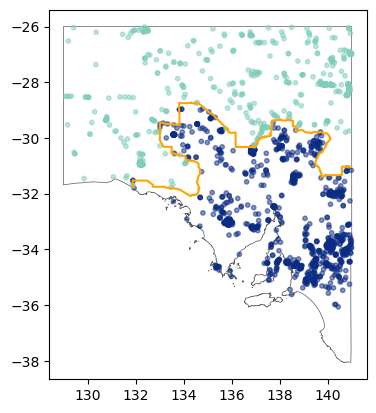

In [30]:
fig , ax = plt.subplots(1,1)
SA.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(SG_SA_occs_NS["decimalLongitude"], SG_SA_occs_NS["decimalLatitude"], color = SG_SA_occs_NS["color"], alpha = 0.5, s=10)
dog_fence.plot(ax = ax, edgecolor = "orange")
plt.savefig("SG_Dingo_Fence_SA_map.png",dpi=300)

In [31]:
##### Cats and Foxes

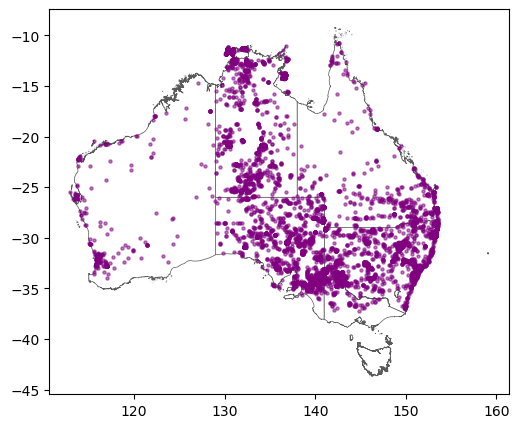

In [40]:
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(
    sand_goanna_occ["decimalLongitude"],
    sand_goanna_occ["decimalLatitude"],
    c = "purple", 
    s = 5,
    alpha = 0.5
)   

In [32]:
# Set up a bounding hull of sand goanna records
sand_goanna_occ = galah.atlas_occurrences(
    taxa="Varanus gouldii",
    use_data_profile=True,
    filters=[
        "basisOfRecord=HUMAN_OBSERVATION", 
        "year>=1970",
        "decimalLatitude<0"]
)

In [47]:
species_points = sand_goanna_occ[["decimalLongitude", "decimalLatitude"]]
alpha_shape = alphashape.alphashape(species_points, 0.5)
alpha_shape_gdf = gpd.GeoDataFrame({"species": "Varanus gouldii", "geometry": [alpha_shape.buffer(0.2)]}, crs="GDA94")

<Axes: >

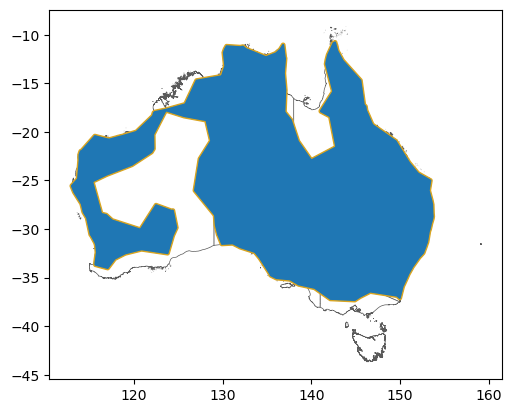

In [48]:
fig , ax = plt.subplots(1,1)
states_territories_main.plot(ax = ax, edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
alpha_shape_gdf.plot(ax = ax, edgecolor = "goldenrod")

In [57]:
# Download cat and fox records in this hull
cats_foxes_occ = galah.atlas_occurrences(
    taxa=["Felis catus", "Vulpes vulpes"], 
    use_data_profile=True, 
    filters=["basisOfRecord=HUMAN_OBSERVATION", "year>=1970"], 
    polygon = alpha_shape_gdf["geometry"][0]
)

In [58]:
cats_foxes_occ

,decimalLatitude,decimalLongitude,eventDate,scientificName,taxonConceptID,recordID,dataResourceName,occurrenceStatus
0,-37.438953,143.905613,2020-08-30T01:00:00Z,Vulpes vulpes,https://biodiversity.org.au/afd/taxa/2869ce8a-...,d62db410-4929-4cb5-b285-bde7e6a65fb3,iNaturalist Australia,PRESENT
1,-37.424386,143.713926,2017-09-22T21:56:00Z,Vulpes vulpes,https://biodiversity.org.au/afd/taxa/2869ce8a-...,c16ace1b-7515-4611-bf48-c1da88f33ec3,iNaturalist Australia,PRESENT
2,-37.414942,144.273683,2006-03-11T22:08:00Z,Vulpes vulpes,https://biodiversity.org.au/afd/taxa/2869ce8a-...,b9ae4ff4-657d-450e-941a-aa2066f543cd,iNaturalist Australia,PRESENT
3,-37.409608,144.270443,2009-03-28T22:17:00Z,Vulpes vulpes,https://biodiversity.org.au/afd/taxa/2869ce8a-...,5c90fd35-8164-452e-9029-917291f583a2,iNaturalist Australia,PRESENT
4,-37.404222,144.266667,2011-04-09T00:05:00Z,Vulpes vulpes,https://biodiversity.org.au/afd/taxa/2869ce8a-...,99e0040e-f0e0-4785-ad44-57cac7cc6fcd,iNaturalist Australia,PRESENT
...,...,...,...,...,...,...,...,...
100970,-11.227841,142.383452,2002-10-03T00:00:00Z,Felis catus,https://biodiversity.org.au/afd/taxa/7de6b16a-...,3c4b9739-6b5c-4611-9a1d-f0be74ed088e,WildNet - Queensland Wildlife Data,PRESENT
100971,-11.206265,130.436545,1994-02-25T00:00:00Z,Felis catus,https://biodiversity.org.au/afd/taxa/7de6b16a-...,deccde81-2aaf-4969-b2a3-b40e734d4c42,Fauna Atlas N.T.,PRESENT
100972,-11.206265,130.436545,1994-02-25T00:00:00Z,Felis catus,https://biodiversity.org.au/afd/taxa/7de6b16a-...,cbea2cba-5724-4836-9fdd-606fa45c1deb,Fauna Atlas N.T.,PRESENT
100973,-11.140337,142.360954,1973-08-27T00:00:00Z,Felis catus,https://biodiversity.org.au/afd/taxa/7de6b16a-...,1688d67e-8233-4314-be28-ab6794758355,WildNet - Queensland Wildlife Data,PRESENT


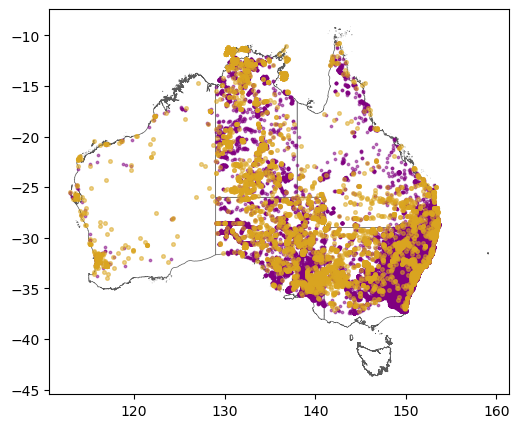

In [60]:
# Plot sand goanna vs cat vs fox on map
states_territories_main.plot(edgecolor = "#5A5A5A", linewidth = 0.5, facecolor = "white", figsize = (12,5))
plt.scatter(cats_foxes_occ["decimalLongitude"], cats_foxes_occ["decimalLatitude"], c = "purple", s = 3, alpha = 0.5)   
plt.scatter(sand_goanna_occ["decimalLongitude"], sand_goanna_occ["decimalLatitude"], c = "goldenrod", s = 7, alpha = 0.5)   

In [ ]:
# Look at trends of cats + foxes vs trends of sand goannas?

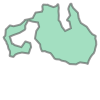

In [51]:
alpha_shape_gdf["geometry"][0]